## Perkenalan


#### Kelompok 5 :
* Yunita Yulianda (PYTN-KS12-001)
* Adjie Perdana Kusuma (PYTN-KS12-010)
* Naufal Reza Pahlevi (PYTN-KS12-021)

#### Latar Belakang Dataset :
Marketing merupakan poin yang krusial untuk perkembangan dan sustainability dari semua bisnis. Poin utama dari marketing adalah memahami customer dengan baik dan mengidentifikasi kebutuhan dari customer. Semakin responsif strategi marketing dalam mengidentifikasi dan memenuhi kebutuhan customer, maka bisnis akan semakin cepat berkembang. Segmentasi merupakan salah satu metode untuk mengelompokkan customer berdasarkan behaviour. Segmentasi memiliki tujuan akhir yaitu memahami customer dan memenuhi kebutuhan dari customer untuk setiap segmen target bisnis. Oleh karena itu dibutuhkan model segmentasi yang baik.
Dataset ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File ini berada pada tingkat pelanggan dengan 18 variabel perilaku. Berikut penjelasan masing-masing kolom :

1. CUSTID - Identifikasi Pemegang Kartu Kredit (Kategori)
2. BALANCE - Jumlah saldo yang tersisa di akun untuk melakukan pembelian
3. BALANCEFREQUENCY - Seberapa sering saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)
4. PURCHASES - Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan sekaligus
6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan
7. CASHADVANCE - Uang muka yang diberikan oleh pengguna
8. PURCHASESFREQUENCY - Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)
9. ONEOFFPURCHASESFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = jarang dibeli)
11. CASHADVANCEFREQUENCY - Seberapa sering pembelian dilakukan secara cicilan (1 = sering dilakukan, 0 = jarang dilakukan)
12. CASHADVANCETRX - Seberapa sering uang muka dibayarkan
13. PURCHASESTRX - Jumlah transaksi yang dilakukan dengan "Uang Muka"
14. CREDITLIMIT - batas kartu kredit pengguna
15. PAYMENTS - Jumlah pembayaran yang dilakukan pengguna
16. MINIMUM_PAYMENTS - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dilakukan oleh pengguna
18. TENURE - Masa penggunaan kartu kredit oleh pengguna

#### Capaian :
Membuat model clustering pada customer credit card serta mengevaluasi behaviour (karakteristik) dari setiap cluster dengan tujuan akhir untuk memenuhi kebutuhan customer untuk segmen/cluster yang ditargetkan

## Import Library yang dibutuhkan

In [1]:
# Data Loading
import numpy as np
import pandas as pd

# Data Exploration
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
#Library Handling Outlier
from feature_engine.outliers import Winsorizer

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Melakukan import library yang dibutuhkan selama proses pengerjaan projek

## Data Loading

In [2]:
# Load data
data = pd.read_csv('Dataset/CC GENERAL.csv')

In [3]:
# Menampilkan Data teratas
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Menampilkan data terbawah
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Berdasarkan 5 data teratas dan terbawah diatas, dapat dilihat bahwa data dapat dibagi menjadi 2 fitur yaitu :

Numerical :

* `CUST_ID`
* `BALANCE`
* `PURCHASES`
* `ONEOFF_PURCHASES`
* `INSTALLMENTS_PURCHASES`
* `CASH_ADVANCE`
* `CASH_ADVANCE_TRX`
* `PURCHASES_TRX`
* `CREDIT_LIMIT`
* `PAYMENTS`
* `MINIMUM_PAYMENTS`
* `PRC_FULL_PAYMENT`
* `TENURE`

Numerical (Sudah ter-scaling antara 0-1) :

* `BALANCE_FREQUENCY`
* `PURCHASES_FREQUENCY`
* `ONEOFF_PURCHASES_FREQUENCY`
* `PURCHASES_INSTALLMENTS_FREQUENCY`
* `CASH_ADVANCE_FREQUENCY`

In [5]:
# Menampilkan dimensi data 
data.shape

(8950, 18)

Menampilkan jumlah baris dan kolom, dapat dilihat bahwa data ini memiliki jumlah baris 8950 dan 18 kolom. 

In [6]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan data diatas, hanya fitur `CUST_ID` yang memiliki tipe data object. Selebihnya bertipe data float64(14 fitur) dan int64(3 fitur).

In [7]:
# Memisahkan kolom numerical dan categorical
data_cat_id = ['CUST_ID']
data_num = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
data_num_scal= ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

# Print kolom
print('Num Columns : ', data_num)
print('Num Columns (Sudah Scaling) : ', data_num_scal)

Num Columns :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Num Columns (Sudah Scaling) :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


Code diatas digunakan untuk memisahkan antara kolom kategorikal, numerical, dan numerical yang sudah ter-scaling. Tujuan adalah melihat persebaran data yang ada pada data yang belum ter-scaling.

In [8]:
# Menampilkan analisis statistik dari data
data[data_num].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
CASH_ADVANCE_TRX,8950.0,3.248827,6.824647,0.000000,0.000000,0.000000,4.000000,123.00000
PURCHASES_TRX,8950.0,14.709832,24.857649,0.000000,1.000000,7.000000,17.000000,358.00000
CREDIT_LIMIT,8949.0,4494.449450,3638.815725,50.000000,1600.000000,3000.000000,6500.000000,30000.00000
PAYMENTS,8950.0,1733.143852,2895.063757,0.000000,383.276166,856.901546,1901.134317,50721.48336
MINIMUM_PAYMENTS,8637.0,864.206542,2372.446607,0.019163,169.123707,312.343947,825.485459,76406.20752


Dari informasi diatas dapat disimpulkan bahwa :

* Customer memiliki balance `rata-rata 1.564` dengan `range 0-19.043`

* Customer memiliki rata-rata total pembelian `1.003` dengan `range 0-49.039`

* Customer yang melakukan pembelian dalam 1x pembayaran memiliki `rata-rata 592` dengan `range 0-40761`

* Cicilan customer memiliki `rata-rata 411` dengan `range 0-22.500`

* Cash Advanced yang dilakukan customer memiliki `rata-rata 978` dengan `range 0-47.137`

* Jumlah transaksi dengan metode cash advanced pada setiap akun memiliki `rata-rata 3` dengan `range 0-123`

* Jumlah transaksi pada setiap akun memiliki `rata-rata 14` dengan `range 0-358`

* Customer memiliki limit credit `rata-rata 4.494` dengan `range 50-30.000` 

* Total payment customer memiliki `rata-rata 1.733` dengan `range 0-50.721`

* Minimum payment customer memiliki `rata-rata 864` dengan `range 0-76.406` 

* Persentase full payment customer memiliki `rata-rata 0.1` dengan `range 0-1` 

* Tenure customer memiliki `rata-rata 11.5` dengan `range 6-12`

## Data Cleaning

In [9]:
# Menampilkan jumlah nilai null dalam data beserta persentasenya

total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MINIMUM_PAYMENTS,313,0.034972
CREDIT_LIMIT,1,0.000112
CUST_ID,0,0.000000
BALANCE,0,0.000000
PRC_FULL_PAYMENT,0,0.000000
PAYMENTS,0,0.000000
PURCHASES_TRX,0,0.000000
CASH_ADVANCE_TRX,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000


Berdasarkan informasi diatas dapat dilihat bahwa terdapat 2 fitur yang memiliki missing value yaitu `MINIMUM_PAYMENT` sebanyak 313 data (3% dari keseluruhan data) dan `CREDIT_LIMIT` yang hanya memiliki 1 missing value. 

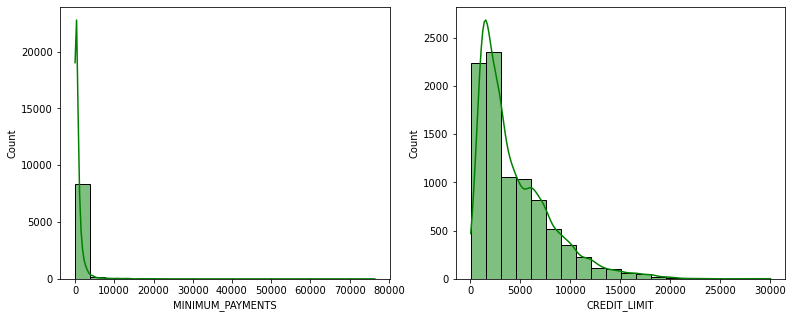

In [10]:
# Menampilkan visualisasi distribusi data yang memiliki missing value

fig, axs = plt.subplots(1,2, figsize=(13, 5))

sns.histplot(data['MINIMUM_PAYMENTS'],bins=20, color='green', kde=True,ax=axs[0]);
sns.histplot(data['CREDIT_LIMIT'],bins=20, color='green', kde=True,ax=axs[1]);

Berdasarkan visualisasi diatas dapat dilihat bahwa 2 fitur yang memiliki missing value tersebut memiliki distribusi skew (condong ke kiri). Maka dapat diambil keputusan untuk jenis distribusi seperti ini nilai missingnya lebih cocok digantikan dengan nilai median guna sedikit memperbaiki distribusinya namun tetap mempertahankan informasi aslinya.

In [14]:
# impute missing value dengan median

data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

Code diatas digunakan untuk mengimput nilai median dari keseluruhan data ke nilai missing yang ada di fitur `MINIMUM_PAYMENT` dan `CREDIT_LIMIT` dengan fungsi .median()

In [15]:
# Cek kembali nilai missingnya 

data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Informasi diatas membuktikan keberhasilan pengimputan data missing value (tidak ada lagi nilai missing dalam data)

In [16]:
# Menghapus kolom CUST_ID

data = data.drop('CUST_ID', 1)

Kolom `CUST_ID` dihapus karena dianggap tidak memberi pengaruh dalam clustering nantinya. Selain itu, fitur ini juga bertipe data object. 

In [17]:
# Membuktikan apakah CUST_ID telah terhapus

data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [18]:
# Cek duplikasi data
data.duplicated().sum()

0

Code diatas digunakan untuk mengecek apakah data memiliki duplikat. Berdasarkan output yang dihasilkan membuktikan bahwa dataset ini tidak memiliki nilai yang duplikat. 

## Data Visualization

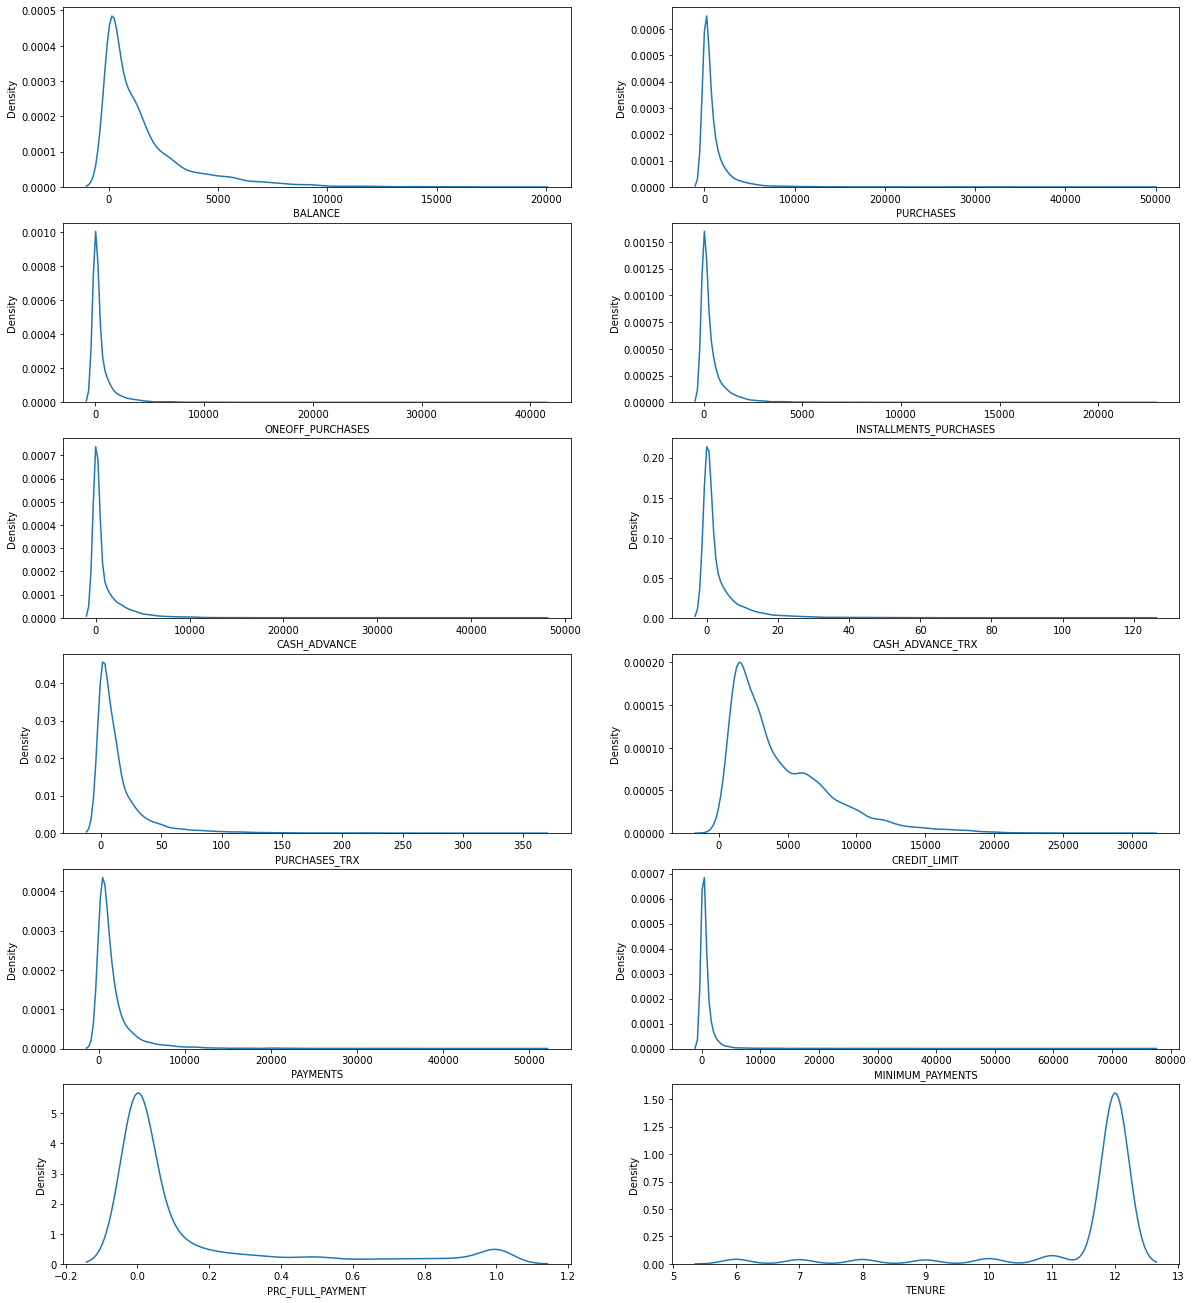

In [19]:
# Visualisasi distribusi data
plt.figure(figsize=(20,35))

for i, col in enumerate(data_num):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

Dari informasi diatas dapat disimpulkan bahwa :

* Balance customer tidak terdistribusi merata (cenderung dibawah 5000)
* Total pembelian dari setiap akun tidak terdistribusi merata (cenderung dibawah 5000)
* Maksimum Value pembelian dalam 1x terdistribusi tidak merata (cenderung dibawah 5000)
* Cicilan customer tidak terdistribusi merata (cenderung dibawah 2500)
* Cash advanced yang dilakukan customer tidak merata (cenderung dibawah 5000)
* Jumlah transaksi metode cash advanced pada setiap akun tidak merata (cenderung dibawah 20 transaksi)
* Jumlah transaksi pembelian pada setiap akun tidak merata (cenderung dibawah 50 transaksi)
* Limit credit customer tidak merata (cenderung dibawah 15.000)
* Total payment customer tidak merata (cenderung dibawah 8000)
* Minimum payment customer tidak merata (cenderung dibawah 5000)
* Persentase full payment customer tidak merata (cenderung dibawah 0.2)
* Tenure tidak merata (terpusat pada 12)

Hampir setiap variabel sangat condong ke kanan atau sangat miring ke kiri, ini menunjukkan bahwa mungkin ada beberapa outlier, yang bukan sesuatu yang sangat mengejutkan karena berkaitan dengan kartu kredit. Tentu saja, akan ada sebagian kecil orang yang memiliki jumlah uang dan batas kredit yang sangat tinggi, sementara sebagian besar orang memiliki jumlah uang dan batas kredit yang kurang lebih sama.

<AxesSubplot:>

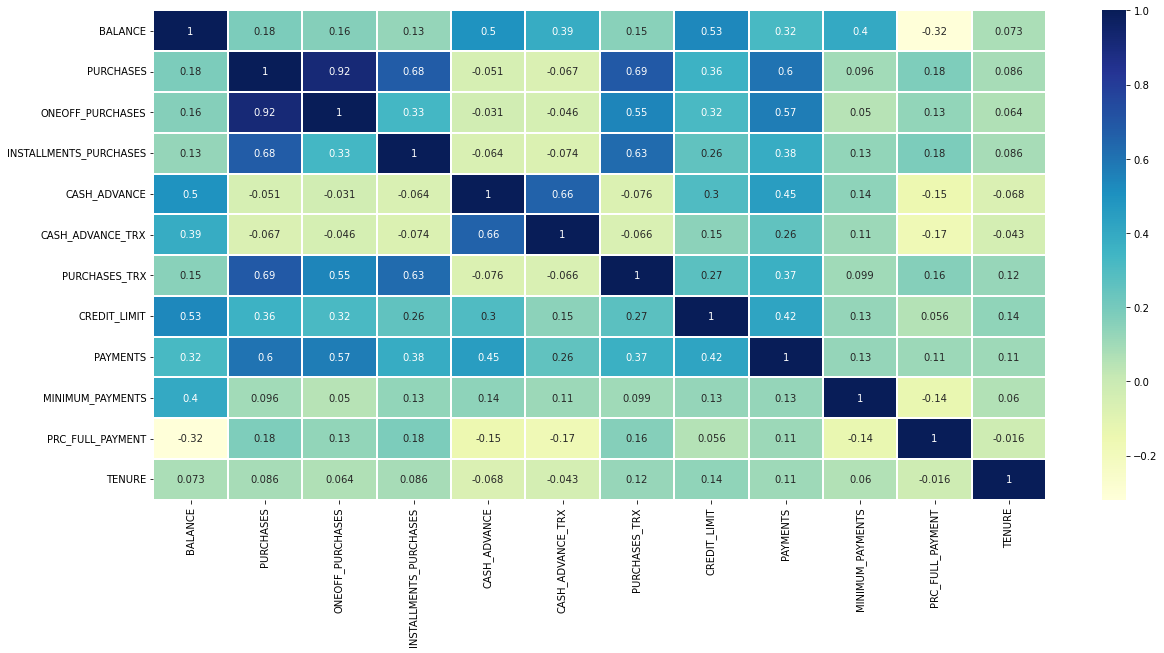

In [20]:
# Visualisasi Korelasi antar fitur Numerical 
corrmat = data[data_num].corr()
  
f, ax = plt.subplots(figsize =(20, 9))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)

Dari informasi diatas dapat disimpulkan bahwa :

* Feature `BALANCE`

    - Korelasi _Sedang_ (>= 0.5) = CASH_ADVANCE, CREDIT_LIMIT 
    

* Feature `PURCHASES`

    - Korelasi _Sedang_ (>= 0.5) = INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES, PURCHASES_TRX, PAYMENTS
    - Korelasi _Tinggi_ (>= 0.9) = ONEOFF_PURCHASES
    

* Feature `ONEOFF_PURCHASES`

    - Korelasi _Sedang_ (>= 0.5) = ONEOFF_PURCHASES, PURCHASES_TRX, PAYMENTS
    

* Feature `INSTALLMENTS_PURCHASES`

    - Korelasi _Sedang_ (>= 0.5) = PURCHASES_INSTALLMENTS, PURCHASES_TRX


* Feature `CASH_ADVANCE`

    - Korelasi _Sedang_ (>= 0.5) = CASH_ADVANCE_TRX
    

* Feature `PURCHASES_TRX`

    - Korelasi _Sedang_ (>= 0.5) = INSTALLMENTS_PURCHASES, ONEOFF_PURCHASES, PURCHASES
    
  
* Feature `PAYMENT`

    - Korelasi _Sedang_ (>= 0.5) = ONEOFF_PURCHASES

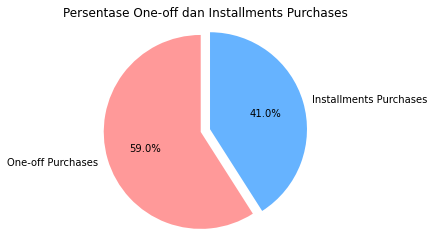

In [21]:
# Visualisasi Perbandingan Cicilan dan bayar langsung

total_oneoff = data['ONEOFF_PURCHASES'].sum()
total_installments = data['INSTALLMENTS_PURCHASES'].sum()

# Menghitung persentase one-off dan installments
percent_oneoff = (total_oneoff / (total_oneoff + total_installments)) * 100
percent_installments = (total_installments / (total_oneoff + total_installments)) * 100

# Membuat pie chart
labels = ['One-off Purchases', 'Installments Purchases']
sizes = [percent_oneoff, percent_installments]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Mengeluarkan potongan 'One-off Purchases'

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Memastikan pie chart menjadi lingkaran
plt.title('Persentase One-off dan Installments Purchases')
plt.show()

Berdasarkan Informasi diatas, dapat dilihat bahwa persentase One-off Purchases lebih tinggi. Hal tersebut menandakan bahwa customer yang tercatat dalam dataset ini lebih banyak menggunakan sistem bayar langsung daripada cicilan. 

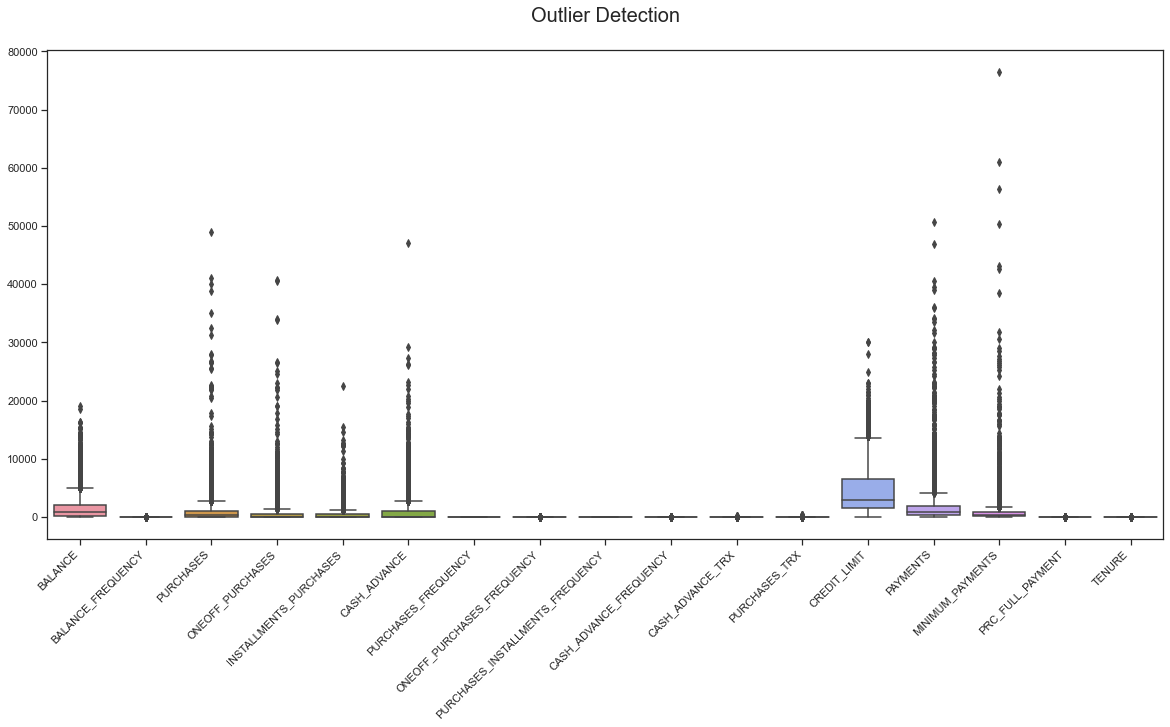

In [22]:
# Menggunakan box plot untuk setiap kolom
sns.set(style="ticks")
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

# Memiringkan tulisan nama kolom
plt.xticks(rotation=45, ha='right')

plt.title('Outlier Detection\n', fontsize=20)
plt.show()

Berdasarkan informasi diatas, dapat dilihat bahwa banyak fitur yang memiliki nilai missing value. Hal ini juga menjadi salah satu alasan datanya tidak berdistribusi normal. 

## Data Preprocessing

In [23]:
df = data.copy()

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Handling Outlier

In [24]:
# Fungsi Pengecekan Outlier

def outliers_check(df,variable):
    global interq
    global lower_boundary
    global upper_boundary
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [25]:
#Pengecekan persentase outlier dari semua feature numerical
for i in df.columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df, i)[0])/len(df)*100),2))
    print('Lower Boundary Feature ', i,'adalah ' ,round((outliers_check(df, i)[1]),2))
    print('Upper Boundary Feature ', i,'adalah ' ,round((outliers_check(df, i)[2]),2))
    print('---')

BALANCE
Jumlah Outlier Feature  BALANCE adalah  194
Persentase Outlier Feature  BALANCE adalah  2.17
Lower Boundary Feature  BALANCE adalah  -5649.29
Upper Boundary Feature  BALANCE adalah  7831.71
---
BALANCE_FREQUENCY
Jumlah Outlier Feature  BALANCE_FREQUENCY adalah  1183
Persentase Outlier Feature  BALANCE_FREQUENCY adalah  13.22
Lower Boundary Feature  BALANCE_FREQUENCY adalah  0.56
Upper Boundary Feature  BALANCE_FREQUENCY adalah  1.33
---
PURCHASES
Jumlah Outlier Feature  PURCHASES adalah  391
Persentase Outlier Feature  PURCHASES adalah  4.37
Lower Boundary Feature  PURCHASES adalah  -3171.85
Upper Boundary Feature  PURCHASES adalah  4321.62
---
ONEOFF_PURCHASES
Jumlah Outlier Feature  ONEOFF_PURCHASES adalah  566
Persentase Outlier Feature  ONEOFF_PURCHASES adalah  6.32
Lower Boundary Feature  ONEOFF_PURCHASES adalah  -1732.22
Upper Boundary Feature  ONEOFF_PURCHASES adalah  2309.62
---
INSTALLMENTS_PURCHASES
Jumlah Outlier Feature  INSTALLMENTS_PURCHASES adalah  395
Persentase

Berdasarkan informasi diatas, outlier yang dimiliki oleh masing-masing fitur cukup banyak. Hal ini dapat disebut sebagai natural outlier karena tentunya dalam penggunaan kartu kredit semua fitur tersebut dipengaruhi oleh perilaku consumer yang berbeda terhadap penggunaan kartu kredit. 

Berikutnya, dilakukan pembuatan list kolom agar memudahkan dalam proses handling outlier menggunakan method .to_list()

In [26]:
#Pembuatan list kolom

columns = df.columns.to_list()
columns

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [27]:
data[columns].nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

Dalam hal ini, handling outlier akan dilakukan menggunakan metode :
- `Winsorizer` yang bekerja dengan menggantikan nilai-nilai outlier dengan nilai-nilai ambang batas atas atau ambang batas bawah yang ditentukan. Dengan kata lain, metode ini memotong ekstrem nilai-nilai outlier dan menggantinya dengan nilai ambang batas yang terdekat. Berikut beberapa alasan metode ini kami gunakan :
    - Menjaga informasi data (pakai metode trimming banyak data yang hilang)
    - Menangani distribusi non-normal
    - Tidak mempengaruhi ukuran sampel
    - Meminimalkan efek ekstrim outlier

Nah, metode ini memiliki sedikit kekurangan yaitu kurang bekerja saat variasi data sedikit seperti pada fitur `TENURE`. Maka dari itu untuk handling outlier fitur tersebut digunakan metode replace dengan nilai median data. 

In [28]:
# Cek Upper Limit dan Lower Limit Feature Tenure
lower_limit_tenure = outliers_check(df,'TENURE')[1]
upper_limit_tenure = outliers_check(df,'TENURE')[2]

# Replace Outlier dengan median
df["TENURE"] = np.where(((df["TENURE"] >upper_limit_tenure)|(df["TENURE"] <lower_limit_tenure)),df["TENURE"].median(),df['TENURE'])

Code diatas digunakan untuk menggantikan nilai outlier pada fitur `TENURE` dan nilai median.

Kemudian, dilakukan pemisahan fitur yang memiliki skew ekstrim dan skew yang tidak ekstrim. Tujuannya adalah untuk menentukan berapa ambang batas yang ditentukan untuk kedua kelompok fitur tersebut.
- Fitur `Skew_biasa` (Skew tidak ekstrim) digantikan dengan metode berikut :
    - Winsorizer 3 IQR yang dilakukan dengan mengidentifikasi batas bawah (lower bound) dan batas atas (upper bound) dengan menggunakan kriteria 3 kali rentang IQR (Interquartile Range). 
    
    
- Fitur `Skew_extreme` digantikan dengan metode berikut :
    - Winsorizer 1.5 IQR yang menggunakan kriteria 1.5 kali rentang IQR untuk mengidentifikasi batas bawah dan batas atas.

In [29]:
# Pemisahan feature berdasarkan skew
skew_biasa = []
skew_extreme = []
normal = []

for i in columns:
    if (df[i].skew() > 0.5 and df[i].skew() <= 1) or (df[i].skew() < -0.5 and df[i].skew() >= -1):
        skew_biasa.append(i)
    elif df[i].skew() >= 1 or df[i].skew() <= -1:
        skew_extreme.append(i)   
    else:
        normal.append(i)

Kemudian, dilakukan print fitur yang termasuk skew_biasa, skew_extreme, dan normal.

In [30]:
skew_biasa

['PURCHASES_INSTALLMENTS_FREQUENCY']

In [31]:
skew_extreme

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [32]:
normal

['PURCHASES_FREQUENCY', 'TENURE']

Selanjutkan dilakukan pembagian dataFrame untuk ketiga pemisahan tersebut.

In [33]:
# Membagi DF sesuai dengan skew-nya

df_skew_extreme = df[skew_extreme]
df_skew_biasa = df[skew_biasa]
df_normal = df[normal]

Dilanjutkan dengan proses mendefinisikan metode winsorizer dan dilakukan fit tranform agar metode dapat diterapkan kedalam data.

In [34]:
# Definisi Winsorizer

winsoriser_extreme = Winsorizer(capping_method='iqr', tail='both', fold=3, variables = skew_extreme)
winsoriser_skew = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables = skew_biasa)

In [35]:
# Fit and transform

df_extreme = winsoriser_extreme.fit_transform(df_skew_extreme)
df_skew = winsoriser_skew.fit_transform(df_skew_biasa)

##### Menggabungkan fitur normal, fitur TENURE, dan fitur winsorizer

In [36]:
# Concat 3 dataframe
df1 = pd.concat([df_extreme,df_skew,df_normal], axis=1)

df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.000000,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,0.083333,0.166667,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,4455.284557,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,0.000000,0.000000,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,0.000000,1.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,0.000000,0.083333,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,0.000000,0.083333,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,0.000000,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,0.833333,1.000000,12.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,0.000000,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,0.833333,1.000000,12.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.000000,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,0.666667,0.833333,12.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,0.000000,0.000000,12.0


Setelah proses penggabungan, dilakukan kembali pengecekan outlier pada data untuk membuktikan metode yang dijalankan telah berhasil.

In [37]:
# Pengecekan persentase outlier dari semua feature numerical
for i in columns:
    print(i)
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(df1, i)[0])/len(df1)*100),2))
    print('---')

BALANCE
Persentase Outlier Feature  BALANCE adalah  0.0
---
BALANCE_FREQUENCY
Persentase Outlier Feature  BALANCE_FREQUENCY adalah  0.0
---
PURCHASES
Persentase Outlier Feature  PURCHASES adalah  0.0
---
ONEOFF_PURCHASES
Persentase Outlier Feature  ONEOFF_PURCHASES adalah  0.0
---
INSTALLMENTS_PURCHASES
Persentase Outlier Feature  INSTALLMENTS_PURCHASES adalah  0.0
---
CASH_ADVANCE
Persentase Outlier Feature  CASH_ADVANCE adalah  0.0
---
PURCHASES_FREQUENCY
Persentase Outlier Feature  PURCHASES_FREQUENCY adalah  0.0
---
ONEOFF_PURCHASES_FREQUENCY
Persentase Outlier Feature  ONEOFF_PURCHASES_FREQUENCY adalah  0.0
---
PURCHASES_INSTALLMENTS_FREQUENCY
Persentase Outlier Feature  PURCHASES_INSTALLMENTS_FREQUENCY adalah  0.0
---
CASH_ADVANCE_FREQUENCY
Persentase Outlier Feature  CASH_ADVANCE_FREQUENCY adalah  0.0
---
CASH_ADVANCE_TRX
Persentase Outlier Feature  CASH_ADVANCE_TRX adalah  0.0
---
PURCHASES_TRX
Persentase Outlier Feature  PURCHASES_TRX adalah  0.0
---
CREDIT_LIMIT
Persentase Ou

Berdasarkan Informasi diatas, dapat dilihat bahwa semua outlier pada fitur sudah 0. Artinya metode yang dilakukan berhasil dan outlier tidak lagi terdeteksi.

### SCALING

Pada tahap ini dilaukan scaling terdahap fitur dalam data. Scaling dilakukan menggunakan metode :
- `RobustScaler` yang merupakan metode yang berguna untuk menangani data yang tidak mengikuti distribusi normal.

In [38]:
# Definisi scaler kemudian fit dan transform
scaling = RobustScaler()
df_scal= pd.DataFrame(scaling.fit_transform(df1), columns=df1.columns.to_list())
df_scal

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,TENURE
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.277777,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,-0.111112,-0.399999,0.0
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,4.000000,-0.277777,1.125001,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,-0.222223,-0.600000,0.0
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,3.055557,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,-0.222223,0.600000,0.0
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,0.000000,0.374999,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,-0.222223,-0.500000,0.0
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,0.000000,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,-0.222223,-0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.438709,0.000000,-0.065540,-0.065812,0.431293,0.000000,-0.277777,0.000000,0.00,-0.0625,-0.408163,-0.350037,-0.426406,3.500004,0.888888,0.600000,0.0
8946,-0.443544,0.000000,-0.057245,-0.065812,0.450241,0.000000,-0.277777,0.000000,0.00,-0.0625,-0.408163,-0.382803,0.000000,0.000000,0.888888,0.600000,0.0
8947,-0.441355,-1.500005,-0.202598,-0.065812,0.118215,0.000000,-0.277777,0.000000,0.00,-0.1250,-0.408163,-0.511003,-0.372135,1.750002,0.666667,0.399999,0.0
8948,-0.446517,-1.500005,-0.337489,-0.065812,-0.189912,0.032823,-0.277777,0.750002,0.50,-0.4375,-0.510204,-0.529925,-0.415288,1.750002,-0.222223,-0.600000,0.0


### PCA

#### Menerapkan Elbow Method

Penggunaan Metode elbow ini digunakan untuk mengetahui jumlah komponen yang di-reduksi. Mencari nilai `n_components` terbaik untuk digunakan dalam PCA.

Metode Elbow (siku) digunakan dalam analisis clustering untuk membantu menentukan jumlah kluster yang optimal dalam data.

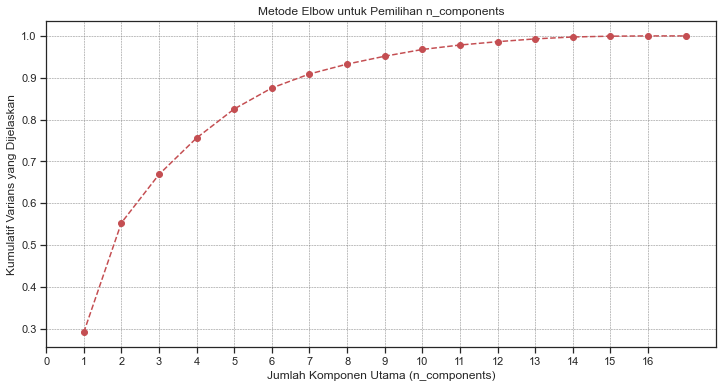

In [39]:
#Plot ke grafik
plt.rcParams["figure.figsize"] = (12,6)

# Melakukan PCA dengan berbagai nilai n_components
n_components = range(1, 18)  # Coba nilai n_components dari 1 hingga 10
explained_variance = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(df_scal)  # X adalah matriks data Anda
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Plotting elbow curve
plt.plot(n_components, explained_variance, 'bo-', linestyle='--', color='r')
plt.xlabel('Jumlah Komponen Utama (n_components)')
plt.xticks(np.arange(0, 17, step=1))
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Metode Elbow untuk Pemilihan n_components')

# Menambahkan garis-garis kisi dalam plot
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

Berdasarkan informasi dari visualisasi diatas, dapat disimpulkan bahwa `n_component` untuk PCA yang dapat menjelaskan 90% variansi adalah 7 komponen. Variasi 90% dipilih karena kenaikan variasi di-atas 90% tidak lagi signifikan.

#### Menggunakan metode PCA dengan n_component Optimal

Setelah menemukan jumlah `n_component` optimal dilakukan PCA dengan menggunakan `n_component` tersebut. 

Tujuannya adalah untuk mengubah dataset yang kompleks dengan banyak variabel menjadi dataset yang lebih sederhana dengan variabel yang lebih sedikit tetapi tetap menjelaskan sebagian besar variasi dalam data.

In [40]:
#Reduksi komponen menggunakan PCA
pca = PCA(n_components=7)
pca.fit(df_scal)
PCA = pca.transform(df_scal)

Selanjutnya, dilakukan pengecekan dimensi data setelah dilakukan PCA dengan 7 component dan berapa persen variasi yang dapat dijelaskan oleh 7 component tersebut.

In [41]:
print('Shape data setelah diterapkan PCA :', PCA.shape)
print('Variansi yang dapat dijelaskan    :', round((np.sum(pca.explained_variance_ratio_)*100),2))

Shape data setelah diterapkan PCA : (8950, 7)
Variansi yang dapat dijelaskan    : 90.9


## Model Definition

Pada proses pengerjaan project clustering ini, algoritma yang dipakai adalah `K-Means` dengan alasan :

- `K-Means` dapat meng-klusterkan semua data (tidak ada data yang tidak masuk kluster)
- `K-Means` memiliki waktu training yang cepat, dapat beradaptasi dengan data baru dan cocok untuk data dengan ukuran besar
- Cocok digunakan untuk dataset yang semuanya berisi numeric feature

Kemudian, metrics yang akan dipakai adalah `Elbow` dan `Silhouette` untuk melakukan pencarian n_cluster terbaik dengan alasan :

- `Silhouette` digunakan karena metrics ini dapat membandingkan setiap cluster untuk melihat performanya
- `Elbow` digunakan karena metrics ini dapat membantu untuk memilih n_cluster yang memiliki inertia rendah

In [42]:
# Mendefinisikan model KMeans

def define_model(i):
    return KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=3)

#### Metode Elbow

Metode elbow (elbow method) adalah salah satu metode yang digunakan untuk menentukan jumlah kluster yang optimal dalam suatu himpunan data. Tujuan utama dari metode elbow adalah untuk menemukan titik "siku" pada grafik penjelasan varian yang dihasilkan dari berbagai jumlah kluster yang berbeda. 

Kami akan coba iterasi n_cluster dengan range 2-15 cluster

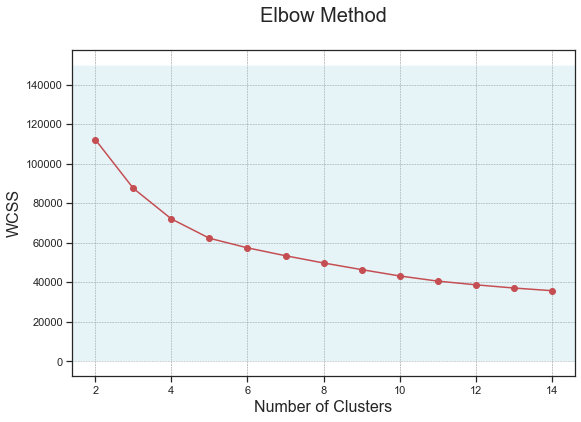

In [43]:
# Mendefinisikan variabel kosong wcss
wcss = []

# Membuat iterasi dari 2-15 untuk nilai k terbaik
for i in range(2, 15):
    # Mendefinisikan model
    km_model = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=3)
    
    # Melakukan pelatihan atau pemfitan model
    km_model.fit(PCA)
    wcss.append(km_model.inertia_)
    
# Mengatur ukuran figure
plt.figure(figsize=(9, 6)) 

# Membuat visualisasi wcss
plt.plot(range(2, 15), wcss, marker="o", color='r')
plt.title('Elbow Method\n', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)

# Menambahkan garis-garis kisi dalam plot
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Memberikan warna latar belakang pada area WCSS yang dipilih
plt.axhspan(-1, 150000, facecolor='lightblue', alpha=0.3) 

plt.show()

Berdasarkan visualisasi diatas, jumlah cluster yang berada di siku grafik adalah cluster 5 karena setelah cluster tersebut penurunan WCSS tidak lagi signifikan.

Setelah menemukan elbow di metod sebelumnya dengan hasil 5 cluster, kami mencoba kembali menggunakan metric silhouete untuk melihat performa dari masing-masing cluster.

Metode siluet (silhouette method) adalah salah satu metode yang digunakan dalam analisis kluster untuk mengevaluasi kualitas kluster yang terbentuk. Metode ini memberikan pengukuran numerik tentang seberapa baik setiap sampel data cocok dengan kluster yang ditugaskan dan seberapa baik kluster tersebut terpisah satu sama lain.

Silhouette score for 2 clusters: 0.3186074522626085
Silhouette score for 3 clusters: 0.2856578646672053
Silhouette score for 4 clusters: 0.28815689943123823
Silhouette score for 5 clusters: 0.30771565414348684
Silhouette score for 6 clusters: 0.281416206400237
Silhouette score for 7 clusters: 0.2835272109466431
Silhouette score for 8 clusters: 0.27526556556999776
Silhouette score for 9 clusters: 0.2874245024763248
Silhouette score for 10 clusters: 0.29791675993432654


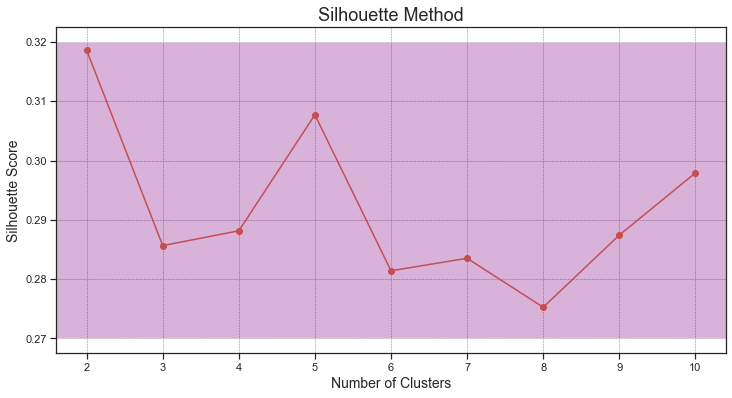

In [44]:
# Menghitung skor silhouette untuk setiap jumlah klaster
silhouette_scores = []
for n_clusters in range(2, 11):
    # Membuat model KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(PCA)
    
    # Menghitung skor silhouette untuk setiap sampel
    silhouette_avg = silhouette_score(PCA, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Cetak skor silhouette untuk jumlah klaster saat ini
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg}')


# Plot skor silhouette untuk setiap jumlah klaster
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Method', fontsize=18)

# Menambahkan garis-garis kisi dalam plot
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Memberikan warna latar belakang pada area WCSS yang dipilih
plt.axhspan(0.27, 0.32, facecolor='purple', alpha=0.3) 

plt.show()

Berdasarkan hasil diatas dapat dilihat bahwa `2 cluster` menghasilkan performa dengan nilai tinggi yaitu `0.318`. Namun `2 clusters` tidak cukup sesuai dengan apa yang diinginkan dan data ini terlalu banyak sehingga tidak efektif dan kurangnya informasi yang dapat diambil jika hanya dibagi ke dalam `2 cluster` saja. 

Maka kami mengambil keputusan untuk mengambil `cluster 5` karena performanya bagus yaitu 0.307 dan dapat menjelaskan banyak karakteristik customer dalam pengelompokkan credt card ini. 

Setelah dilakukan 2 metric untuk menentukan jumlah cluster, dapat disimpulkan bahwa jumlah cluster yang optimal adalah `5 cluster.`

## Model Evaluation

Pada tahap ini, dilakukan clustering dengan model kmeans yang telah didefinisikan sebelumnya. 

In [45]:
#Fit,Training dan predict KMeans
model_km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
cluster = model_km.fit_predict(PCA)
cluster

array([2, 1, 2, ..., 3, 3, 3])

In [46]:
#Print iterasi yang konvergen
model_km.n_iter_

9

Dapat dilihat bahwa itrasi sudah konvergen pada angka 9, maka dapat dipastikan model yang sudah ditraining sudah cukup baik.

In [47]:
unique_values = set(cluster)
print(unique_values)

{0, 1, 2, 3, 4}


Berdasarkan hasil diatas dapat dilihat bahwa cluster yang terbentuk ada 5 dimulai dari cluster 0

##### Visualisasi Cluster

Pada tahap ini, cluster tersebut akan di visualisasikan. Untuk menampilkan visualisasi data tersebut tentunya harus direduksi kembali menjadi 2 dimensi saja. Reduksi tersebut dilakukan kembali menggunakan PCA

In [48]:
from sklearn.decomposition import PCA as PC

#Reduksi komponen menggunakan PCA
pca_vis = PC(n_components=2)
pca_vis.fit(df_scal)
visualisasi = pca_vis.transform(df_scal)

In [49]:
#Membuat dataframe PC1 dan PC2
reduced_data= pd.DataFrame(visualisasi, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-2.000664,-1.528015
1,-1.157155,2.579739
2,0.984098,-0.096924
3,-0.526023,-1.122358
4,-1.586650,-0.728877


In [50]:
#Concat dengan Cluster
reduced_data['Clusters']= cluster
reduced_data.head()

,PC1,PC2,Clusters
0,-2.000664,-1.528015,2
1,-1.157155,2.579739,1
2,0.984098,-0.096924,2
3,-0.526023,-1.122358,3
4,-1.586650,-0.728877,2


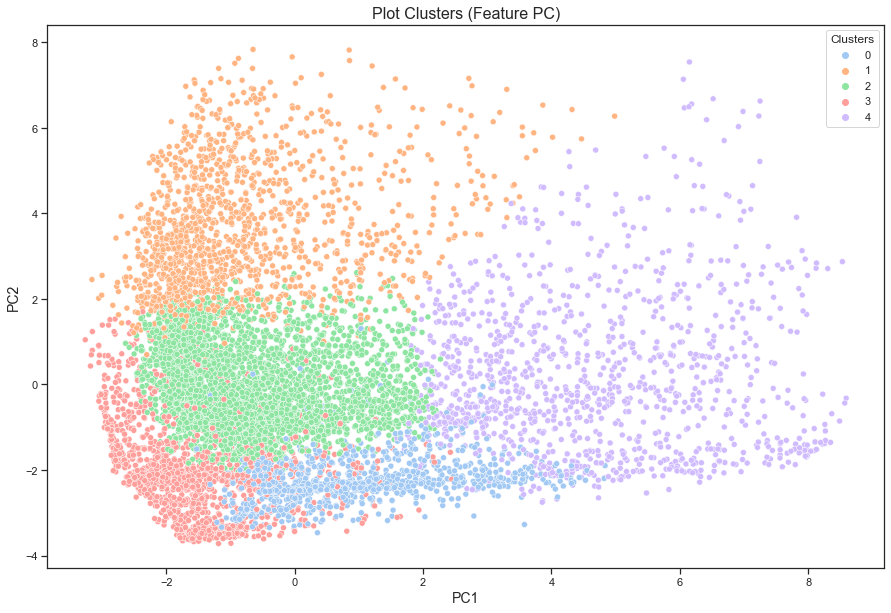

In [51]:
#Visualisasi cluster
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=reduced_data, hue="Clusters",palette='pastel')
plt.title('Plot Clusters (Feature PC)',fontsize=16)
plt.xlabel('PC1',fontsize=14)
plt.ylabel('PC2',fontsize=14)
plt.show()

Berdasarkan visualisasi diatas dapat diambil kesimpulan bahwa :

- Setiap cluster yang memiliki PC2 > 2 banyak yang tersebar
- Cluster 0 terpusat di titik PC1 < 4 dan PC2 < 0
- Cluster 1 tersebar di titik PC1 < 5 dan PC2 > , Cluster ini adalah cluster yang tersebar (tidak terpusat)
- Cluster 2 terpusat di titik PC1 < 2 DAN PC2 < 2
- Cluster 3 terpusat di titik PC1 < 0 dan PC2 < 0 
- Cluster 4 tersebar di titik PC1 < 8 dan PC2 < 8, cluster yang paling menyebar

Proses selanjutnya adalah menampilkan cluster ke dalam dataframe data awal dengan menambah atribut CLUSTER.

In [52]:
#Concat dengan cluster
df_cluster = df1.copy()
df_cluster['CLUSTER']= cluster
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.000000,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,0.083333,0.166667,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.00,4455.284557,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,0.000000,0.000000,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,0.000000,1.000000,12.0,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,0.000000,0.083333,12.0,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,0.000000,0.083333,12.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,0.000000,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,0.833333,1.000000,12.0,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,0.000000,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,0.833333,1.000000,12.0,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.000000,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,0.666667,0.833333,12.0,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,0.000000,0.000000,12.0,3


##### Deskripsi statistik data 

In [53]:
# Mengatur opsi tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

#Print Statistik Deskripsi Dasar dari setiap Cluster
df_cluster.groupby('CLUSTER').describe()

BALANCE                                                                                          BALANCE_FREQUENCY                                                                       PURCHASES                                                                           ONEOFF_PURCHASES                                                                      INSTALLMENTS_PURCHASES                                                                    CASH_ADVANCE                                                                                    ONEOFF_PURCHASES_FREQUENCY                                                             CASH_ADVANCE_FREQUENCY                                                                  CASH_ADVANCE_TRX                                                  PURCHASES_TRX                                                    CREDIT_LIMIT                                                                    PAYMENTS                                                    \
          count         mean          std        min          25%          50%          75%          max             count      mean       std       min       25%       50%       75%       max     count         mean         std     min       25%       50%        75%       max            count         mean         std  min       25%      50%        75%      max                  count         mean         std  min     25%      50%        75%      max        count         mean          std  min          25%          50%          75%          max                      count      mean       std  min       25%       50%       75%  max                  count      mean       std  min       25%       50%       75%       max            count       mean       std  min  25%   50%   75%   max         count       mean        std  min   25%   50%   75%   max        count         mean          std    min     25%     50%      75%      max    count         mean          std        min          25%   
CLUSTER                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0        1033.0   125.432512   166.515625   4.421403    40.607669    79.189929   147.085066  2000.797758            1033.0  0.939158  0.100094  0.555556  0.909091  1.000000  1.000000  1.000000    1033.0  1009.789724  762.023981    0.00   428.000   799.830  1432.6600  4321.615           1033.0   293.557493  475.394078  0.0     0.000     0.00   451.5000  2309.62                 1033.0   665.753688  548.626121  0.0  245.85   501.85   994.0000  1874.55       1033.0    34.709709   249.506481  0.0     0.000000     0.000000     0.000000  4455.284557                     1033.0  0.216811  0.333003  0.0  0.000000  0.000000  0.333333  1.0                 1033.0  0.008705  0.042260  0.0  0.000000  0.000000  0.000000  0.500000           1033.0   0.115198  0.576755  0.0  0.0   0.0   0.0   6.0        1033.0  17.639884  12.046021  0.0  10.0  13.0  22.0  65.0       1033.0  4220.256094  3375.985578  300.0  1500.0  3000.0   6000.0  21200.0   1033.0  1085.180144   926.699202  56.715447   426.404957   
1        1435.0  394

Dari informasi diatas dapat disimpulkan bahwa :

Cluster 0

- Memiliki balance yang paling rendah dari semua cluster, dengan rata-rata 125
- Sering update balance
- Sering melakukan pembelian
- Memiliki value pembelian dengan metode Cash Advance paling rendah di-antara cluster lain
- Paling sering melakukan pembelian dengan metode Installment Purchases dari pada cluster lain
- Paling tidak sering melakukan pembelian dengan metode Cash Advance dari pada cluster lain
- Memiliki persentase payments paling tinggi dari pada cluster lain

Cluster 1 

- Memiliki balance yang paling tinggi dari semua cluster, dengan rata-rata 3945
- Sering update balance
- Memiliki value pembelian dengan metode Cash Advance paling tinggi di-antara cluster lain
- Paling tidak sering melakukan pembelian dari pada semua cluster
- Tidak sering melakukan pembelian dengan metode Installment Purchases dari pada cluster lain
- Paling sering melakukan metode Cash Advance

Cluster 2

- Sering update balance
- Tidak sering melakukan pembelian
- Memiliki credit limit paling rendah dari pada cluster lain
- Memiliki payments paling rendah dari pada cluster lain
- Memiliki persentase payments lebih rendah dari pada cluster lain

Cluster 3 

- Tidak sering update balance
- Memiliki pembelian dengan value yang paling rendah diantara cluster lain
- Pada metode One Off Purchases dan Installment Purchases, memiliki pembelian dengan value yang paling rendah diantara cluster lain
- Tidak sering melakukan pembelian
- Paling tidak sering melakukan pembelian dengan metode One Off Purchases dan Installment Purchasesdari pada cluster lain
- Sering melakukan pembelian dengan metode Cash Advance dari pada cluster lain

Cluster 4 

- Sering update balance
- Sering melakukan pembelian
- Memiliki pembelian dengan value yang paling tinggi diantara cluster lain
- Pada metode One Off Purchases dan Installment Purchases, memiliki pembelian dengan value yang paling tinggi diantara cluster lain
- Memiliki credit limit paling tinggi dari pada cluster lain
- Memiliki payments paling tinggi dari pada cluster lain
- Tidak sering melakukan pembelian dengan metode cash advance 

##### Visualisasi fitur `Balance` dengan fitur fitur `Purchase`

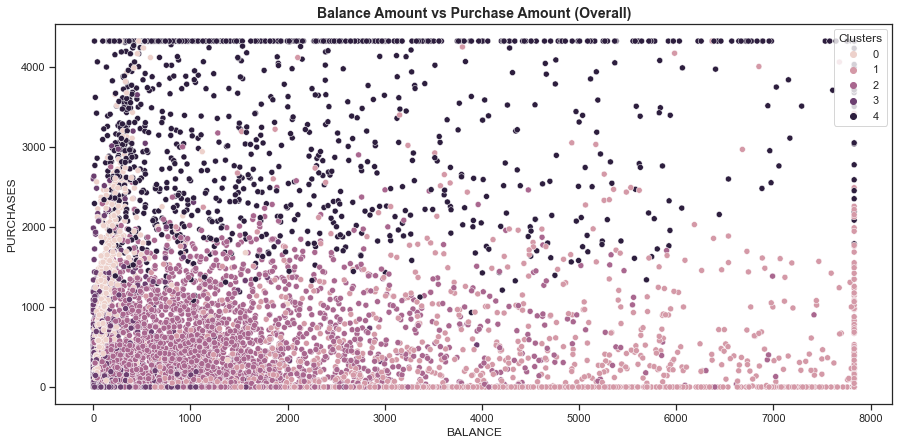

In [54]:
#Visualisasi Balance Amount VS Purchase Amount
plt.figure(figsize=(15,7))

sns.scatterplot(x="BALANCE", y="PURCHASES", hue="CLUSTER", data=df_cluster)
plt.title('Balance Amount vs Purchase Amount (Overall)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [55]:
df_cluster[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CLUSTER']].groupby('CLUSTER').describe()

BALANCE                                                                                          ONEOFF_PURCHASES                                                                      INSTALLMENTS_PURCHASES                                                                    CASH_ADVANCE                                                                                   
          count         mean          std        min          25%          50%          75%          max            count         mean         std  min       25%      50%        75%      max                  count         mean         std  min     25%      50%        75%      max        count         mean          std  min          25%          50%          75%          max
CLUSTER                                                                                                                                                                                                                                                                                                                                                                                 
0        1033.0   125.432512   166.515625   4.421403    40.607669    79.189929   147.085066  2000.797758           1033.0   293.557493  475.394078  0.0     0.000     0.00   451.5000  2309.62                 1033.0   665.753688  548.626121  0.0  245.85   501.85   994.0000  1874.55       1033.0    34.709709   249.506481  0.0     0.000000     0.000000     0.000000  4455.284557
1        1435.0  3945.950453  2238.431038  78.114579  2009.926064  3613.551586  5690.251341  7831.714396           1435.0   220.171206  427.857954  0.0     0.000     0.00   233.9650  2309.62                 1435.0   163.281861  353.214842  0.0    0.00     0.00   133.3200  1874.55       1435.0  3123.794012  1252.705250  0.0  2100.771434  3269.418821  4455.284557  4455.284557
2        3740.0  1294.786413  1102.981895   0.488050   477.404095  1088.752512  1719.791120  7831.714396           3740.0   227.172144  382.400251  0.0     0.000     0.00   311.7125  2309.62                 3740.0   195.010251  322.499385  0.0    0.00     0.00   289.3125  1874.55       3740.0   399.208537   630.089119  0.0     0.000000    45.243479   603.609401  4455.284557
3        1575.0   176.914792   361.513043   0.000000     8.141792    31.734061   153.775824  3947.749703           1575.0   187.466876  388.003640  0.0     0.000     0.00   175.7650  2309.62                 1575.0   137.458267  250.227074  0.0    0.00     0.00   178.4750  1874.55       1575.0   419.089391   909.426294  0.0     0.000000     0.000000   297.667752  4455.284557
4        1167.0  2289.300649  2186.115392  12.423203   536.026034  1503.884481  3299.890013  7831.714396           1167.0  1768.253736  681.312516  0.0  1336.215  2165.12  2309.6200  2309.62                 1167.0  1024.181045  688.463703  0.0  400.13  1024.00  1874.5500  1874.55       1167.0   473.562564  1020.304398  0.0     0.000000     0.000000   286.647537  4455.284557

Dari visualisasi dan informasi statistik diatas dapat disimpulkan bahwa :

Cluster 0

- Memiliki value pembelian dengan metode Cash Advance paling rendah di-antara cluster lain (terpusat dibawah 3.000)

Cluster 1

- Memiliki balance yang paling tinggi dari semua cluster (terpusat diatas 4.000)
- Memiliki value pembelian dengan metode Cash Advance paling tinggi di-antara cluster lain (terpusat diatas 4.000)

Cluster 2

- Memiliki value purchase yang rendah (terpusat dibawah 2.000)

Cluster 3

- Memiliki pembelian dengan value yang paling rendah diantara cluster lain (terpusat dibawah 3.000)
- Pada metode One Off Purchases dan Installment Purchases, memiliki pembelian dengan value yang paling rendah diantara cluster lain (terpusat diatas 1.000)

Cluster 4

- Pada metode One Off Purchases dan Installment Purchases, memiliki pembelian dengan value yang paling tinggi diantara cluster lain (terpusat diatas 1.750)

##### Visualisasi fitur `Credit Limit` dengan fitur fitur `Purchase`

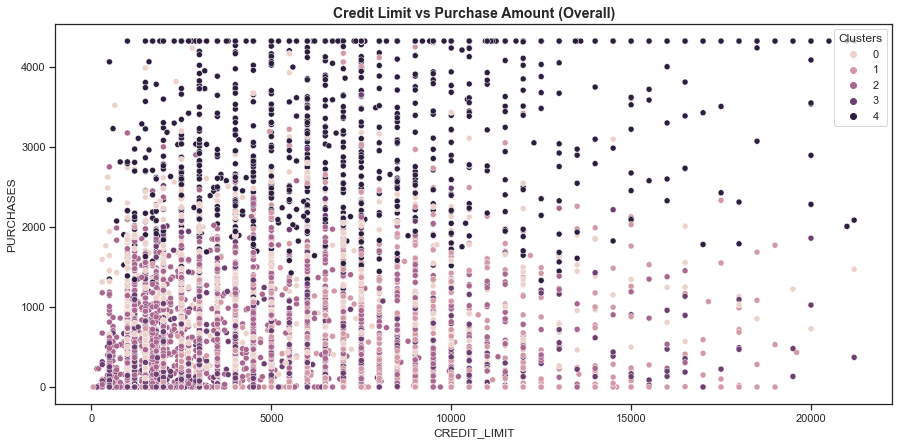

In [56]:
#Visualisasi Credit Limit VS Purchase Amount
plt.figure(figsize=(15,7))

sns.scatterplot(x="CREDIT_LIMIT", y="PURCHASES", hue="CLUSTER", data=df_cluster)
plt.title('Credit Limit vs Purchase Amount (Overall)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [57]:
df_cluster[['CREDIT_LIMIT','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CLUSTER']].groupby('CLUSTER').describe()

CREDIT_LIMIT                                                                    ONEOFF_PURCHASES                                                                      INSTALLMENTS_PURCHASES                                                                    CASH_ADVANCE                                                                                   
               count         mean          std    min     25%     50%      75%      max            count         mean         std  min       25%      50%        75%      max                  count         mean         std  min     25%      50%        75%      max        count         mean          std  min          25%          50%          75%          max
CLUSTER                                                                                                                                                                                                                                                                                                                                                                
0             1033.0  4220.256094  3375.985578  300.0  1500.0  3000.0   6000.0  21200.0           1033.0   293.557493  475.394078  0.0     0.000     0.00   451.5000  2309.62                 1033.0   665.753688  548.626121  0.0  245.85   501.85   994.0000  1874.55       1033.0    34.709709   249.506481  0.0     0.000000     0.000000     0.000000  4455.284557
1             1435.0  6680.909091  3671.145116   50.0  4000.0  6000.0   9000.0  19600.0           1435.0   220.171206  427.857954  0.0     0.000     0.00   233.9650  2309.62                 1435.0   163.281861  353.214842  0.0    0.00     0.00   133.3200  1874.55       1435.0  3123.794012  1252.705250  0.0  2100.771434  3269.418821  4455.284557  4455.284557
2             3740.0  3161.470588  2546.393435  150.0  1500.0  2400.0   4000.0  16500.0           3740.0   227.172144  382.400251  0.0     0.000     0.00   311.7125  2309.62                 3740.0   195.010251  322.499385  0.0    0.00     0.00   289.3125  1874.55       3740.0   399.208537   630.089119  0.0     0.000000    45.243479   603.609401  4455.284557
3             1575.0  3658.360141  3137.378092  150.0  1500.0  2900.0   4500.0  21200.0           1575.0   187.466876  388.003640  0.0     0.000     0.00   175.7650  2309.62                 1575.0   137.458267  250.227074  0.0    0.00     0.00   178.4750  1874.55       1575.0   419.089391   909.426294  0.0     0.000000     0.000000   297.667752  4455.284557
4             1167.0  7418.064968  4306.091310  500.0  4000.0  6700.0  10000.0  21200.0           1167.0  1768.253736  681.312516  0.0  1336.215  2165.12  2309.6200  2309.62                 1167.0  1024.181045  688.463703  0.0  400.13  1024.00  1874.5500  1874.55       1167.0   473.562564  1020.304398  0.0     0.000000     0.000000   286.647537  4455.284557

Dari Visualisasi dan informasi statistik diatas dapat disimpulkan bahwa :

Cluster 0

- Sering melakukan pembelian dengan metode Installment Purchases dari pada cluster lain
- Memiliki credit limit terpusat dibawah 6000

Cluster 1

- Memiliki value pembelian dengan metode Cash Advance paling tinggi di-antara cluster lain


Cluster 2

- Memiliki credit limit paling rendah dari pada cluster lain (terpusat di bawah 4.000)


Cluster 3

- Memiliki pembelian dengan value yang paling rendah diantara cluster lain
- Pada metode One Off Purchases dan Installment Purchases, memiliki pembelian dengan value yang paling rendah diantara cluster lain
- Memiliki credit limit terpusat dibawah 4000 (hampir sama seperti cluster 0)

Cluster 4

- Memiliki credit limit paling tinggi dari pada cluster lain (terpusat diatas 10.000)
- Memiliki pembelian dengan value yang paling tinggi diantara cluster lain

##### Visualisasi fitur `Credit Limit` dengan fitur `Payment`

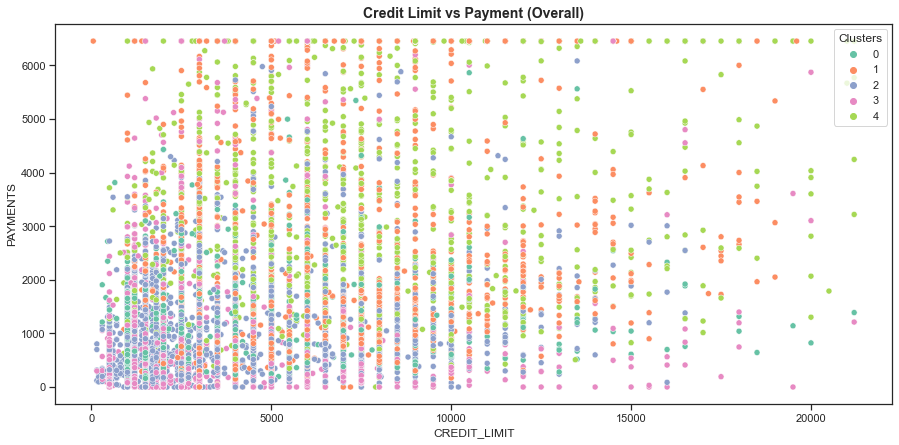

In [58]:
#Visualisasi Credit Limit VS Payment
plt.figure(figsize=(15,7))

sns.scatterplot(x="CREDIT_LIMIT", y="PAYMENTS", hue="CLUSTER", palette="Set2", data=df_cluster)
plt.title('Credit Limit vs Payment (Overall)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', loc='upper right')
plt.show()

In [59]:
df_cluster[['CREDIT_LIMIT','PAYMENTS','CLUSTER']].groupby('CLUSTER').describe()

CREDIT_LIMIT                                                                    PAYMENTS                                                                                         
               count         mean          std    min     25%     50%      75%      max    count         mean          std        min          25%          50%          75%          max
CLUSTER                                                                                                                                                                                  
0             1033.0  4220.256094  3375.985578  300.0  1500.0  3000.0   6000.0  21200.0   1033.0  1085.180144   926.699202  56.715447   426.404957   828.169919  1458.490552  6454.708769
1             1435.0  6680.909091  3671.145116   50.0  4000.0  6000.0   9000.0  19600.0   1435.0  2537.658294  1963.600305   0.000000  1066.680763  1809.593702  3597.620071  6454.708769
2             3740.0  3161.470588  2546.393435  150.0  1500.0  2400.0   4000.0  16500.0   3740.0   835.340011   806.129145   0.000000   326.395662   590.755344  1064.754725  6454.708769
3             1575.0  3658.360141  3137.378092  150.0  1500.0  2900.0   4500.0  21200.0   1575.0   973.431472  1445.093858   0.000000   163.604594   403.640958  1086.437404  6454.708769
4             1167.0  7418.064968  4306.091310  500.0  4000.0  6700.0  10000.0  21200.0   1167.0  3386.400431  1921.914963   0.000000  1828.530137  2972.248185  4880.935868  6454.708769

Berdasarkan informasi diatas dapat disimpulkan bahwa :

- Urutan Credit limit = payment untuk semua cluster, artinya kedua variabel ini sangat terikat satu sama lain. 

## Kesimpulan 

Berdasarkan berbagai informasi diatas, dapat disimpulkan bahwa karakteristik customer dari 5 clusters tersebut yaitu :

**Cluster 0 (Tipe customer yang memiliki ekonomi rendah sehingga sering menggunakan metode cicilan)**

Customer pada cluster ini memiliki balance yang rendah dari pada cluster lain. Oleh karena itu customer ini, sering melakukan pembelian dengan metode Installment. Balance yang rendah juga menyebabkan customer, memiliki value pembelian pada metode Cash Advance lebih rendah dari pada cluster lain (customer ini juga jarang menggunakan metode cash advance). Kemudian karena banyak cicilan (akibat installment method), customer ini memiliki persentase payment yang lebih tinggi dari pada customer lain.

**Cluster 1 (Tipe customer yang mengincar barang berkualitas)**

Customer ini memiliki balance yang paling tinggi diantara cluster lain. Oleh karena itu customer ini lebih sering melakukan pembelian dengan metode Cash Advance dari pada metode Installment Purchases. Meskipun memiliki balance tinggi, customer pada cluster ini paling tidak sering melakukan pembelian (Tipe customer yang mengincar kualitas, karena jarang beli tetapi pada saat beli value cash advance nya tinggi).

**Cluster 2 (Tipe customer yang hemat)**

Customer pada cluster ini cenderung melakukan pembelian sesuai kebutuhan, karena customer ini jarang melakukan pembelian. Selain itu customer ini, memiliki credit limit yang rendah sehingga value payment yang dilakukan customer juga rendah. Akan tetapi customer ini sering melakukan update balance pada credit card-nya.

**Cluster 3 (Tipe customer lebih senang menggunakan metode Cash)**

Customer pada cluster ini, memiliki value pembelian yang lebih rendah diantara cluster lain. Customer ini juga jarang melakukan pembelian dengan metode Installment Purchases dan One Off Purchases. Customer ini cenderung menggunakan metode Cash Advance. Customer ini juga paling jarang mengupdate balance nya dari pada semua cluster.

**Cluster 4 (Tipe customer yang memiliki ekonomi tinggi)**

Customer pada cluster ini memiliki value pembelian yang lebih tinggi dari pada cluster lain. Hal ini disebabkan customer memiliki credit limit yang lebih tinggi dari pada cluster lain. Karena sering melakukan pembelian maka jumlah payments dari customer ini lebih tinggi dari pada cluster lain. Metode yang sering digunakan customer ini adalah One Off Purchases (lebih sering dari pada cluster lain). Customer ini memiliki value purchases yang paling besar pada metode One off purchases juga dengan metode installment purchases, karena cluster ini juga jarang melakukan metode cash advance. Customer ini juga sering melakukan update balance.

Kesimpulan terkait data :

Data credit card ini memiliki banyak atribut tetapi ada beberapa atribut yang memiliki korelasi sangat tinggi, artinya ada atribut yang memiliki karakteristik data yang hampir sama. Sehingga pada proses yang sudah kami lakukan diatas, kami melakukan reduksi sehingga menghasilkan hanya 7 atribut yang dapat menjelaskan 90% variasi dari keseluruhan data. 